<a href="https://colab.research.google.com/github/JidapaBur/TH_Avg_HouseholdIncome/blob/main/TH_Avg_HouseholdIncome.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Thailand(2011-2023): Analysis of Household Average Monthly Income, Expenses, and GDP


## 1.Introduction
We present the relationship between average monthly income, expenses, and GDP in Thailand (2011-2023) to better understand how economic growth affects people’s earnings and spending habits. By analyzing data, we can see whether higher GDP leads to higher income and expenses or if other factors influence financial stability. We will use correlation analysis to measure how strongly these factors are connected. This will help identify trends in household spending, income growth, and economic well-being. The results of this study can provide useful insights for policymakers, businesses, and individuals to make informed financial and economic decisions.

In [28]:
import sys
import pandas as pd
import numpy as np
import IPython
from IPython.display import display, Markdown, Latex, HTML, IFrame, JSON, Code, Image, YouTubeVideo, clear_output


print( f"Python {sys.version}" )
print( f"Pandas {pd.__version__}" )
print( f"NumPy {np.__version__}" )

Python 3.11.11 (main, Dec  4 2024, 08:55:07) [GCC 11.4.0]
Pandas 2.2.2
NumPy 2.0.2


##Data Tables

*   Table of Household Income
*   Table of Household Expense
*   Table of Thailand GDP
*   Table of Merge 3 tables (Income,Expenses,GDP)







###Table of Household Income


In [29]:
url1 = "https://raw.githubusercontent.com/JidapaBur/TH_Avg_HouseholdIncome/main/TH_Avg_HouseholdIncome.csv"
df_income = pd.read_csv(url1)
df1 = df_income[ df_income['REGION'] == 'ทั่วราชอาณาจักร' ] [ ['YEAR', 'REGION', 'MONTHLY_INCOME'] ]
group1 = df1.groupby( ['YEAR', 'REGION'] )
tb1 = group1[['MONTHLY_INCOME'] ].agg('mean').round().reset_index()

display(tb1.head(5))

,YEAR,REGION,MONTHLY_INCOME
0,2554,ทั่วราชอาณาจักร,24457.0
1,2556,ทั่วราชอาณาจักร,26170.0
2,2558,ทั่วราชอาณาจักร,27086.0
3,2560,ทั่วราชอาณาจักร,27184.0
4,2562,ทั่วราชอาณาจักร,26212.0


###Table of Household Expense

In [30]:
url2 = "https://raw.githubusercontent.com/JidapaBur/TH_Avg_HouseholdIncome/main/TH_Avg_HouseholdOutcome.csv"
df_outcome = pd.read_csv(url2)
df2 = df_outcome.loc[ (df_outcome['TYPE_EXPENSE'] == 'ค่าใช้จ่ายทั้งสิ้นต่อเดือน') & (df_outcome['REGION'] == 'ทั่วราชอาณาจักร') ] [ ['YEAR', 'REGION', 'TYPE_EXPENSE','VALUE'] ].reset_index(drop=True)
group2 = df2.groupby( ['YEAR', 'REGION'] )
tb2 = group2[['VALUE'] ].agg('mean').round().reset_index()

display(tb2.head(5))

,YEAR,REGION,VALUE
0,2554,ทั่วราชอาณาจักร,18103.0
1,2556,ทั่วราชอาณาจักร,19756.0
2,2558,ทั่วราชอาณาจักร,21272.0
3,2560,ทั่วราชอาณาจักร,21607.0
4,2562,ทั่วราชอาณาจักร,20893.0


###Table of Thailand GDP

In [31]:
url3 = "https://raw.githubusercontent.com/JidapaBur/TH_Avg_HouseholdIncome/main/TH_GDP.csv"
df_gdp = pd.read_csv(url3)
df_gdp.head()
df3 = df_gdp.loc[ (df_gdp['Yea'] != 'Q1') & (df_gdp['Yea'] != 'Q2') & (df_gdp['Yea'] != 'Q3') & (df_gdp['Yea'] != 'Q4')] [ ['Yea', 'Gross Domestic Product'] ].reset_index(drop=True)

#BE = lambda x: x+543
#df3['Yea'].apply(BE)

df3['Yea'] = df3['Yea'].astype(int)
df3[['YEAR']] = df3[['Yea']].apply(lambda x: x+543)
df3['Gross Domestic Product'] = df3['Gross Domestic Product'].str.replace(',', '').astype(float)
df3[['GDP_Month']] = df3[['Gross Domestic Product']].apply(lambda x: ((x/66)/12)*2.5).round()
df3.head()

tb3 = df3[['YEAR', 'GDP_Month']]

tb3.head(5)

,YEAR,GDP_Month
0,2536,10301.0
1,2537,11645.0
2,2538,13313.0
3,2539,14642.0
4,2540,14868.0


### Merge 3 tables (Income, Expense, GDP)

In [32]:
#Merge Table of income and expense

tb12 = pd.merge(tb1, tb2, on=['YEAR', 'REGION'], how='inner')
tb12 = tb12.reset_index(drop=True)

#Rename Columns
tb_inner = tb12.rename(columns={'MONTHLY_INCOME': 'Income', 'VALUE': 'Expense'})
tb14 = tb_inner[[ 'YEAR', 'Income', 'Expense']]
tb14['Gap'] = tb14['Income'] - tb14['Expense']

#Merge Table of GDP
tb13 = pd.merge(tb14, tb3, on=['YEAR'], how='inner')
tb13 = tb13.rename(columns={'Income':'INCOME_Month', 'Expense':'EXPENSE_Month'})
tb = tb13[[ 'YEAR', 'INCOME_Month', 'EXPENSE_Month', 'GDP_Month']]
tb['Gap'] = tb['INCOME_Month'] - tb['EXPENSE_Month']
tb['YEAR'] = tb['YEAR'].apply(lambda x: x-543)

display(tb.head(10))

,YEAR,INCOME_Month,EXPENSE_Month,GDP_Month,Gap
0,2011,24457.0,18103.0,35691.0,6354.0
1,2013,26170.0,19756.0,40768.0,6414.0
2,2015,27086.0,21272.0,43382.0,5814.0
3,2017,27184.0,21607.0,48891.0,5577.0
4,2019,26212.0,20893.0,53312.0,5319.0
5,2021,27537.0,21763.0,51100.0,5774.0
6,2023,29165.0,23802.0,56572.0,5363.0


### Merge 4 Table (Income, Expense, GDP , Inflation)

In [50]:
inflation_df = pd.read_csv(
    'https://raw.githubusercontent.com/JidapaBur/TH_Avg_HouseholdIncome/main/thailand-inflation-rate-cpi.csv',
    encoding='utf-8-sig',
    on_bad_lines='skip'
)

# ✅ ใช้ชื่อ inflation_df ให้ตรงกัน
inflation_df['YEAR'] = pd.to_datetime(inflation_df['Date'], dayfirst=True).dt.year

inflation_df.tail(10)

#Merge Table of GDP
tb = pd.merge(tb, inflation_df, on=['YEAR'], how='inner')
tb = tb.rename(columns={'Value':'Inflation'})
tb["Real_Income"] = tb["INCOME_Month"] / (1 + (tb["Inflation-rate"]/100))
tb["Real_Expense"] = tb["EXPENSE_Month"] / (1 + (tb["Inflation-rate"]/100))

tb.tail(10)

,YEAR,INCOME_Month,EXPENSE_Month,GDP_Month,Gap,Date_x,Inflation-rate_x,% Change_x,Real_Income,Real_Expense,...,PurchasingPower,INCOME_Growth,Accum_Wage_Index,Accum_Inflation_Index,Date_y,Inflation-rate_y,% Change_y,Date,Inflation-rate,% Change
0,2011,24457.0,18103.0,35691.0,6354.0,31/12/2011,7.0564,2.4336,22844.967699,16909.778397,...,1.350992,NaN,100.000000,107.056400,31/12/2011,7.0564,2.4336,31/12/2011,7.0564,2.4336
1,2013,26170.0,19756.0,40768.0,6414.0,31/12/2013,5.1998,-1.8566,24876.473149,18779.503383,...,1.324661,7.004130,135.746606,112.623119,31/12/2013,5.1998,-1.8566,31/12/2013,5.1998,-1.8566
2,2015,27086.0,21272.0,43382.0,5814.0,31/12/2015,0.9947,-4.2051,26819.229128,21062.491398,...,1.273317,3.500191,135.746606,113.743381,31/12/2015,0.9947,-4.2051,31/12/2015,0.9947,-4.2051
3,2017,27184.0,21607.0,48891.0,5577.0,31/12/2017,0.8537,-0.1410,26953.894602,21424.102437,...,1.258111,0.361811,140.271493,114.714408,31/12/2017,0.8537,-0.1410,31/12/2017,0.8537,-0.1410
4,2019,26212.0,20893.0,53312.0,5319.0,31/12/2019,1.7706,0.9169,25755.964886,20529.504592,...,1.254583,-3.575633,149.321267,116.745541,31/12/2019,1.7706,0.9169,31/12/2019,1.7706,0.9169
5,2021,27537.0,21763.0,51100.0,5774.0,31/12/2021,0.3845,-1.3861,27431.525783,21679.641777,...,1.265313,5.054937,152.036199,117.194428,31/12/2021,0.3845,-1.3861,31/12/2021,0.3845,-1.3861
6,2023,29165.0,23802.0,56572.0,5363.0,31/12/2023,7.3054,6.9209,27179.433654,22181.549111,...,1.225317,5.912046,160.180995,125.755950,31/12/2023,7.3054,6.9209,31/12/2023,7.3054,6.9209


### Merge 5 Table (Income, Expense, GDP , Inflation , Minimun Labor)

In [34]:
#Labor = pd.read_csv('Minimum labor rate.csv')
url5 = "https://raw.githubusercontent.com/JidapaBur/TH_Avg_HouseholdIncome/main/Minimum%20labor%20rate.csv"
Labor = pd.read_csv(url5)
Labor = Labor.rename(columns={'Year':'YEAR'})

Labor.tail(10)

,Labor,YEAR,Unnamed: 2,Min,Max,Baht
10,ค่าแรงขั้นต่ำ,2014,คือ,300,300,บาท
11,ค่าแรงขั้นต่ำ,2015,คือ,300,300,บาท
12,ค่าแรงขั้นต่ำ,2016,คือ,300,300,บาท
13,ค่าแรงขั้นต่ำ,2017,คือ,300,310,บาท
14,ค่าแรงขั้นต่ำ,2018,คือ,300,310,บาท
15,ค่าแรงขั้นต่ำ,2019,คือ,300,330,บาท
16,ค่าแรงขั้นต่ำ,2020,คือ,313,336,บาท
17,ค่าแรงขั้นต่ำ,2021,คือ,313,336,บาท
18,ค่าแรงขั้นต่ำ,2022,คือ,323,354,บาท
19,ค่าแรงขั้นต่ำ,2023,คือ,323,354,บาท...


In [35]:
#Merge Table of GDP
tb = pd.merge(tb, Labor, on=['YEAR'], how='inner')
tb = tb.rename(columns={'Max': 'Max of Minimum Labor', 'Min': 'Min of Minimum Labor'})
tb['Wage_Growth_%'] = tb['Max of Minimum Labor'].pct_change() * 100
tb.tail(10)

,YEAR,INCOME_Month,EXPENSE_Month,GDP_Month,Gap,Date,Inflation-rate,% Change,Real_Income,Real_Expense,Labor,Unnamed: 2,Min of Minimum Labor,Max of Minimum Labor,Baht,Wage_Growth_%
0,2011,24457.0,18103.0,35691.0,6354.0,31/12/2011,7.0564,2.4336,22844.967699,16909.778397,ค่าแรงขั้นต่ำ,คือ,159,221,บาท,NaN
1,2013,26170.0,19756.0,40768.0,6414.0,31/12/2013,5.1998,-1.8566,24876.473149,18779.503383,ค่าแรงขั้นต่ำ,คือ,300,300,บาท,35.746606
2,2015,27086.0,21272.0,43382.0,5814.0,31/12/2015,0.9947,-4.2051,26819.229128,21062.491398,ค่าแรงขั้นต่ำ,คือ,300,300,บาท,0.000000
3,2017,27184.0,21607.0,48891.0,5577.0,31/12/2017,0.8537,-0.1410,26953.894602,21424.102437,ค่าแรงขั้นต่ำ,คือ,300,310,บาท,3.333333
4,2019,26212.0,20893.0,53312.0,5319.0,31/12/2019,1.7706,0.9169,25755.964886,20529.504592,ค่าแรงขั้นต่ำ,คือ,300,330,บาท,6.451613
5,2021,27537.0,21763.0,51100.0,5774.0,31/12/2021,0.3845,-1.3861,27431.525783,21679.641777,ค่าแรงขั้นต่ำ,คือ,313,336,บาท,1.818182
6,2023,29165.0,23802.0,56572.0,5363.0,31/12/2023,7.3054,6.9209,27179.433654,22181.549111,ค่าแรงขั้นต่ำ,คือ,323,354,บาท...,5.357143


## 2.Trend Analysis

In [36]:
import matplotlib as mpl
%matplotlib inline
import matplotlib.pyplot as plt
import plotly

print( f"Matplotlib {mpl.__version__}" )
print( f"Matplotlib backend: {mpl.get_backend()}")
print(f'Pandas {pd.__version__} [Plotting backend = {pd.options.plotting.backend}]')
print(f'Plotly {plotly.__version__}')

# https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html
plt.style.use('seaborn-v0_8')   # The 'seaborn' style is deprecated, 'ggplot'

Matplotlib 3.10.0
Matplotlib backend: module://matplotlib_inline.backend_inline
Pandas 2.2.2 [Plotting backend = matplotlib]
Plotly 5.24.1


### 2.1 Comparing Household Income with GDP per Household

<Figure size 3750x1250 with 0 Axes>

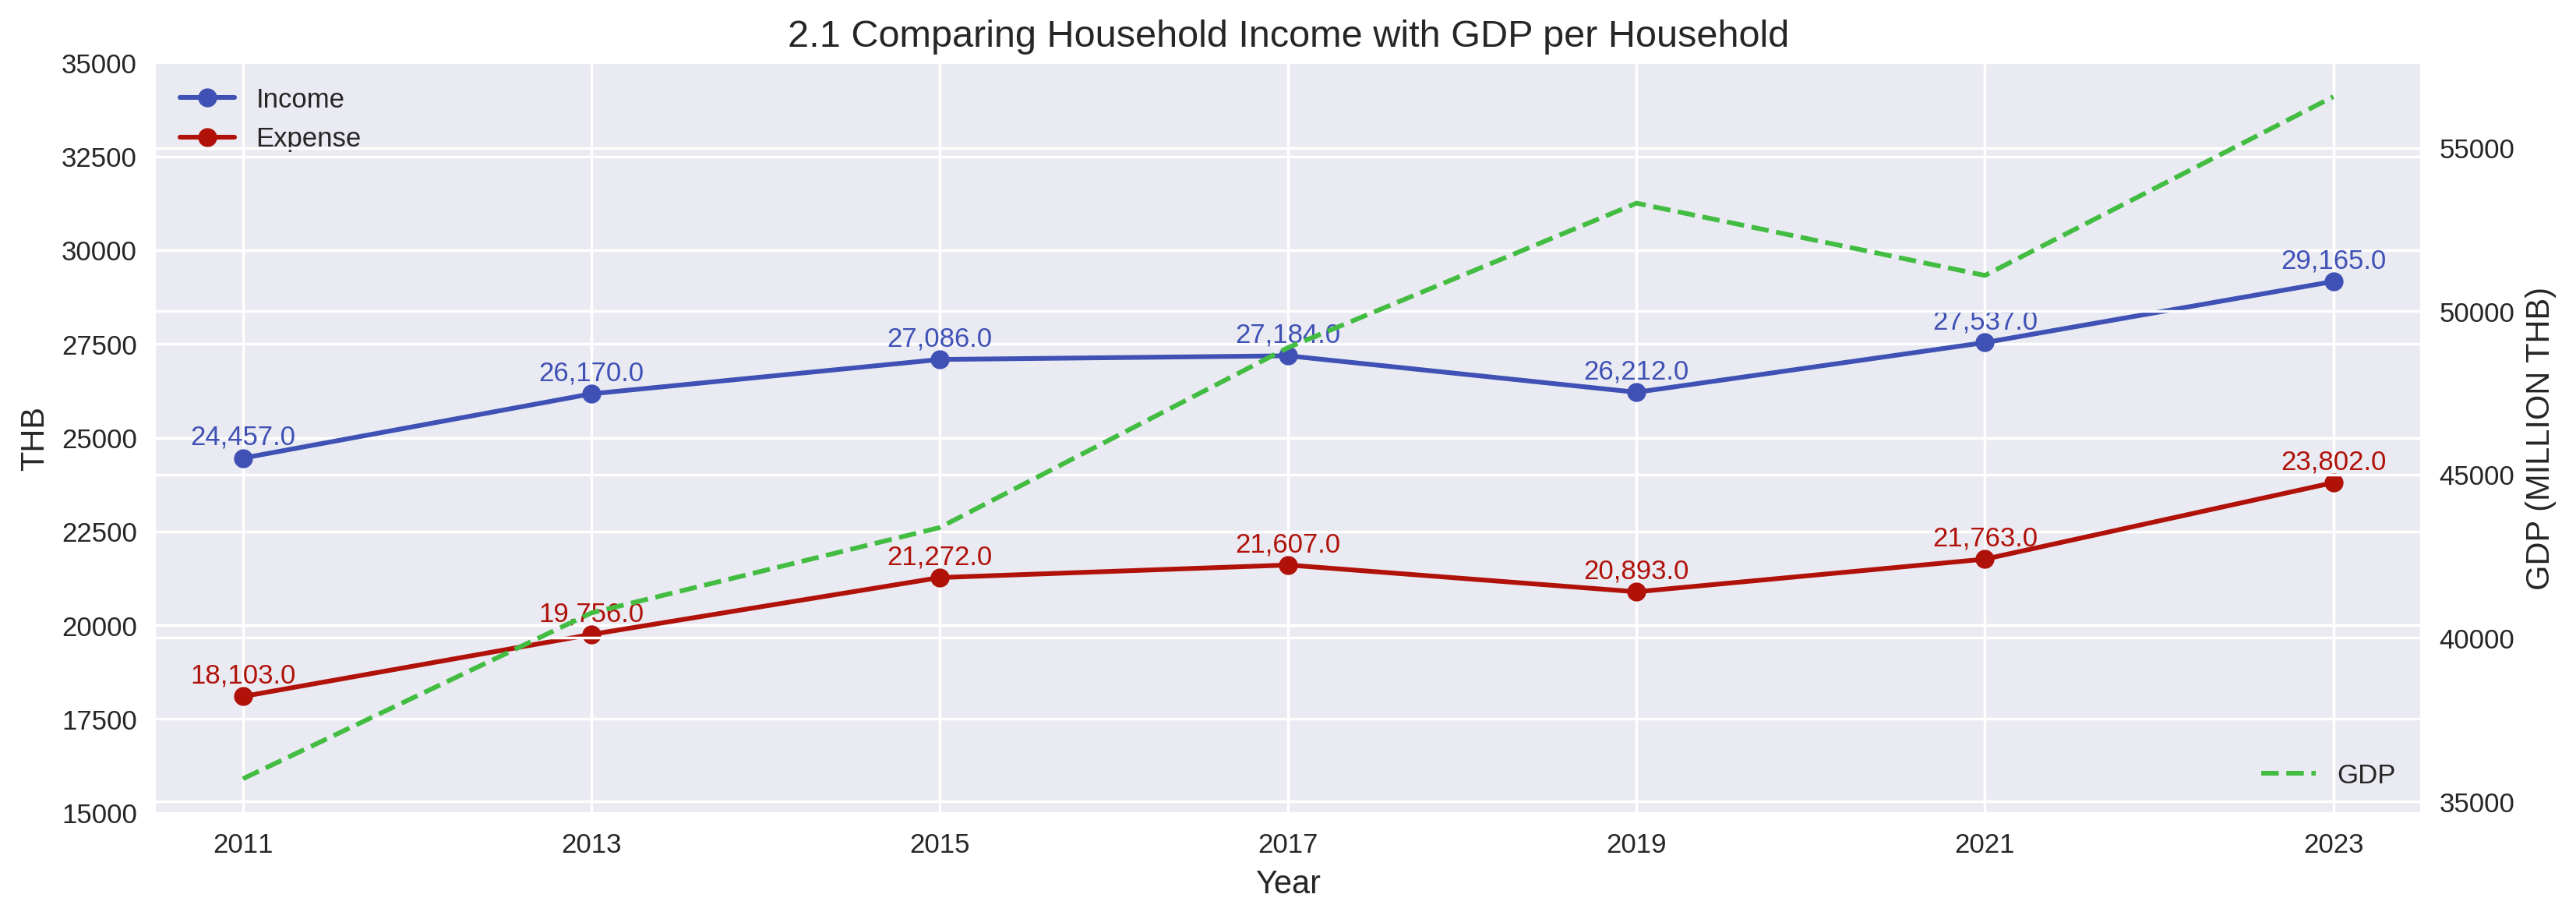

In [37]:
plt.figure(figsize=(15, 5), dpi=250)
fig, ax1 = plt.subplots(figsize=(15, 5), dpi=250)

# Plot: Alternative 1
ax1.plot(tb['YEAR'], tb['INCOME_Month'], color='#3f51b5', marker='o', label='Income')
ax1.plot(tb['YEAR'], tb['EXPENSE_Month'], color='#b0120a', marker='o', label='Expense')

# Create a second y-axis for GDP
ax2 = ax1.twinx()
ax2.plot(tb['YEAR'], tb['GDP_Month'], color='#42bd41', linestyle='--', label='GDP')

# Customize y-axis limits
ax1.set_ylim(15000, 35000)
ax1.set_ylabel('THB', fontsize=12)  # Set label for the first y-axis

# Annotate the data points for Income and Expense
for i, txt in enumerate(tb['INCOME_Month']):
    ax1.annotate(f'{txt:,.1f}', (tb['YEAR'][i], tb['INCOME_Month'][i]), textcoords="offset points", xytext=(0, 5), ha='center', fontsize=10, color='#3f51b5')

for i, txt in enumerate(tb['EXPENSE_Month']):
    ax1.annotate(f'{txt:,.1f}', (tb['YEAR'][i], tb['EXPENSE_Month'][i]), textcoords="offset points", xytext=(0, 5), ha='center', fontsize=10, color='#b0120a')

#for i, txt in enumerate(tb['GDP_Month']):
#    ax2.annotate(f'{txt:,.1f}', (tb['YEAR'][i], tb['GDP_Month'][i]), textcoords="offset points", xytext=(0, 5), ha='center', fontsize=10, color='#42bd41')

# Set titles and labels
ax1.set_title("2.1 Comparing Household Income with GDP per Household", fontsize=14)
ax1.set_xlabel("Year", fontsize=12)
ax2.set_ylabel("GDP (MILLION THB)", fontsize=12)
ax1.legend(loc="upper left")
ax2.legend(loc="lower right")
plt.xlim(min(tb['YEAR'])-0.5, max(tb['YEAR'])+0.5)
plt.xticks(tb['YEAR'].unique())
# Show the plot
plt.show()


### 2.2 Comparing Household Expenses with Income



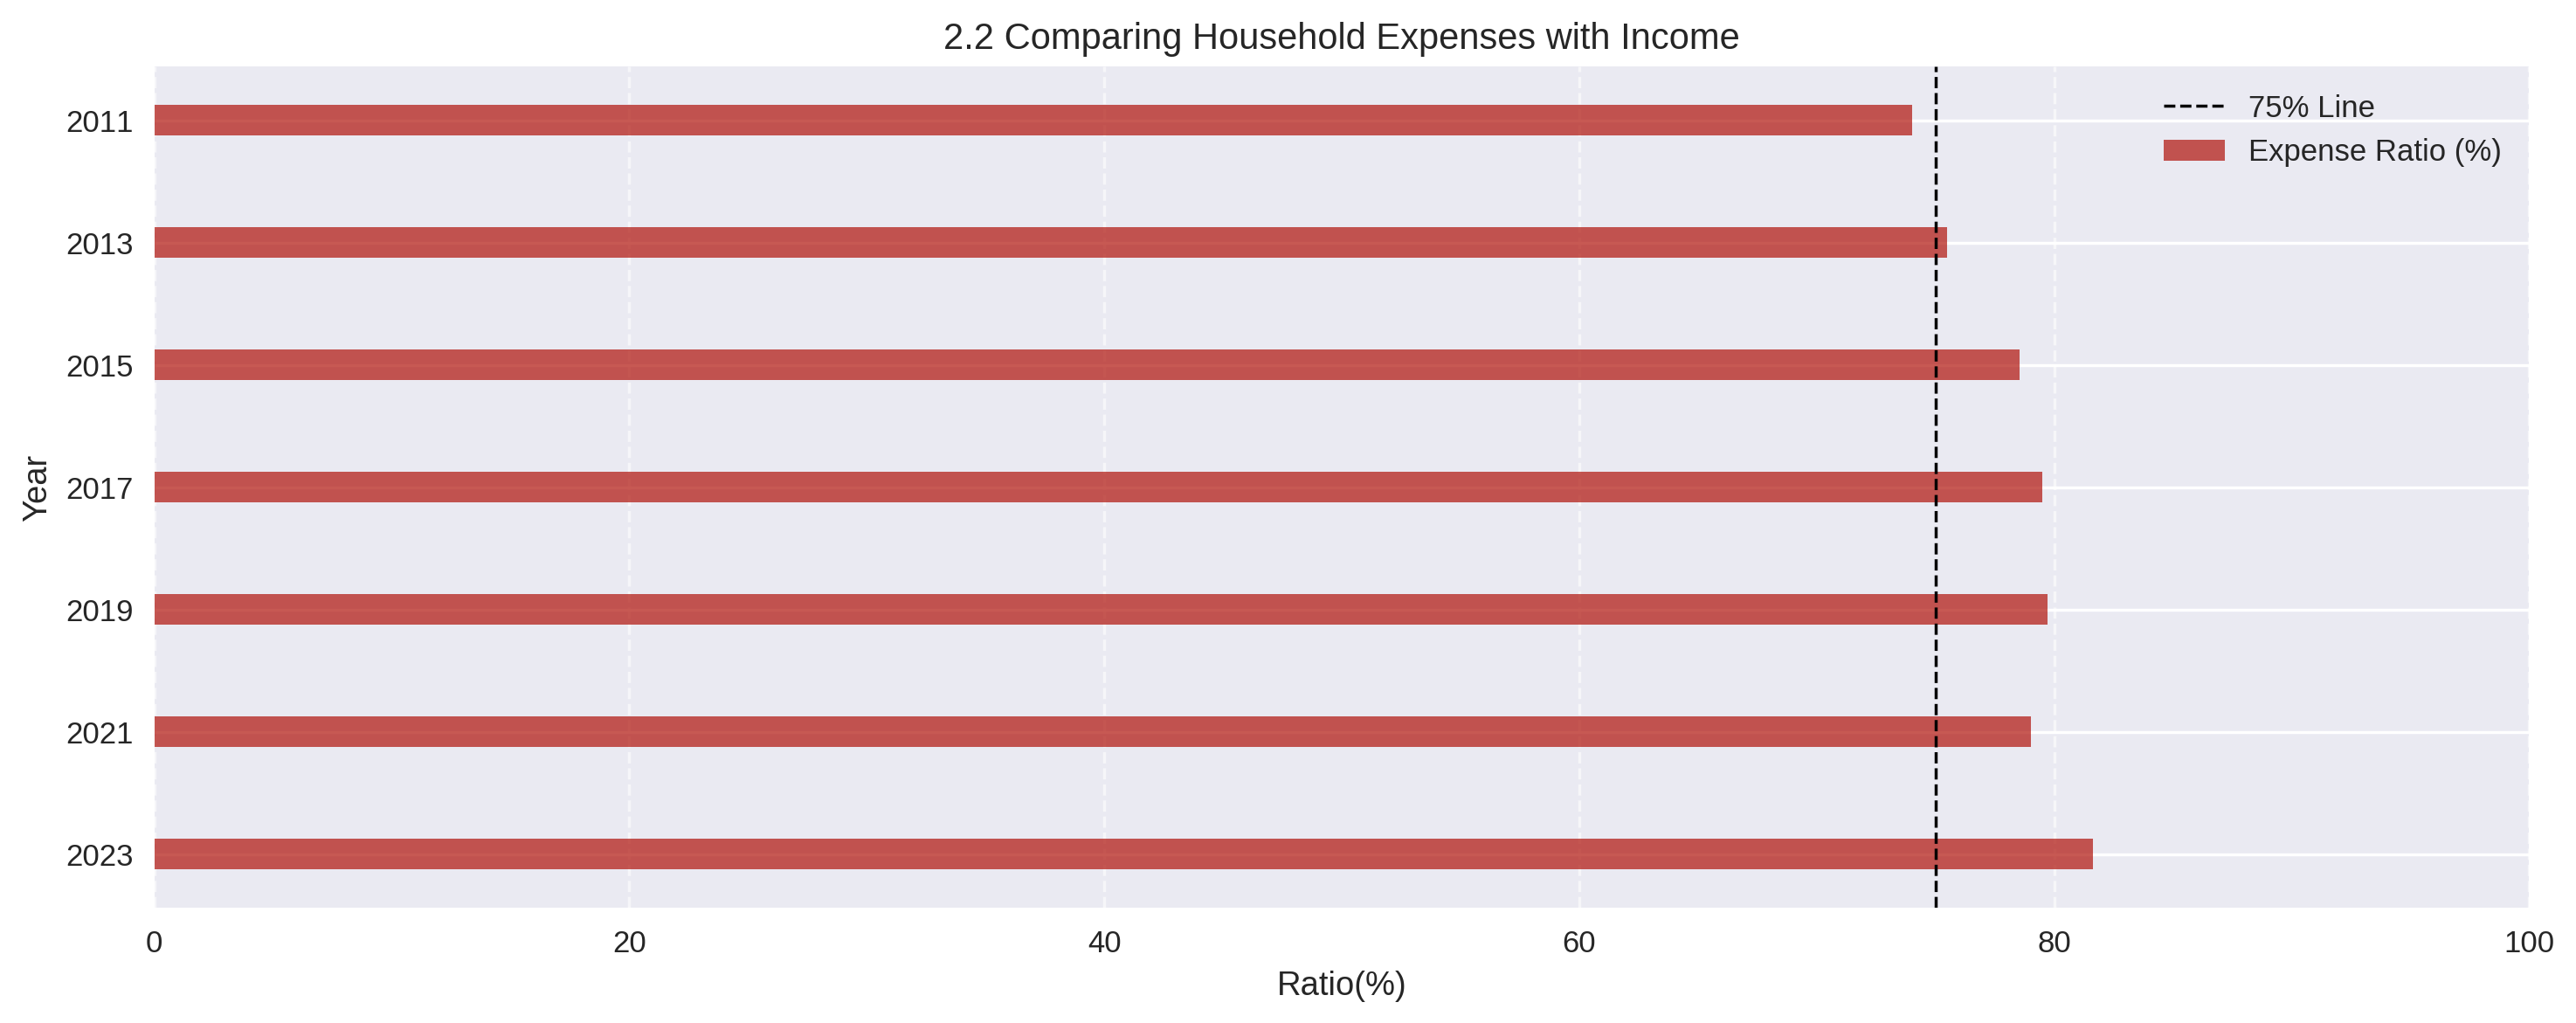

In [38]:
#tb['INCOME_Ratio_Percent'] = (tb['INCOME_Month']) / (tb['INCOME_Month'] + tb['EXPENSE_Month'])
tb['EXPENSE_Ratio_Percent'] = (tb['EXPENSE_Month']) / (tb['INCOME_Month'])

plt.figure(figsize=(15, 5), dpi=250)
bar_width = 0.5  # custom width bar

#plt.barh(tb['YEAR'], tb['INCOME_Ratio_Percent'] * 100, height=bar_width, label='Income Ratio (%)', color='#3f51b5', alpha=0.7)
plt.barh(tb['YEAR'], tb['EXPENSE_Ratio_Percent'] * 100, height=bar_width, label='Expense Ratio (%)', color='#b0120a', alpha=0.7)

# Added Line
plt.axvline(x=75, color='black', linestyle='--', linewidth=1, label='75% Line')

# Custom space graph
plt.subplots_adjust(right=0.85)

plt.xlabel('Ratio(%)')
plt.ylabel('Year')
plt.title('2.2 Comparing Household Expenses with Income')
plt.legend(loc='best', bbox_to_anchor=(1, 1))
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.yticks(sorted(tb['YEAR'].unique()))
plt.xlim(0,100)
plt.gca().invert_yaxis()

plt.show()



#### 2.2.1 Comparing Household Expenses  by type


In [39]:
df_Type = df_outcome.loc[
    (df_outcome['TYPE_EXPENSE'] != 'ค่าใช้จ่ายทั้งสิ้นต่อเดือน') &
    (df_outcome['REGION'] == 'ทั่วราชอาณาจักร')
][['YEAR', 'REGION', 'TYPE_EXPENSE', 'VALUE']].reset_index(drop=True)

# รวมยอดรายจ่ายตามประเภทในแต่ละปี
df_Type = df_Type.groupby(['YEAR', 'REGION', 'TYPE_EXPENSE'])[['VALUE']].agg('sum').round().reset_index()


Type of Expences

In [40]:
expense_translation = {
    'อาหาร และเครื่องดื่ม ที่ไม่ใช่แอลกอฮอล์': 'Food & Beverages',
    'การเดินทางและคมนาคมขนส่ง': 'Transportation',
    'การศึกษา': 'Education',
    'สุขภาพ งานสาธารณสุข และยาสันติ': 'Health & Medical',
    'เครื่องแต่งกายและรองเท้า': 'Clothing & Footwear',
    'เช่น ค่าส่ง ค่ามือถือ': 'Telecommunication',
    'การจัดงานพิธีในโอกาสพิเศษ': 'Special Events',
    'การบันเทิง การอ่านและกิจกรรมทางศาสนา': 'Special Events',
    'อาหาร และเครื่องดื่ม (ไม่มีแอลกอฮอล์)': 'Food & Beverages',
    'เครื่องดื่มที่มีแอลกอฮอล์': 'Alcoholic drinks',
    'เครื่องนุ่งห่มและรองเท้า': 'Clothing and shoes',
    'เวชภัณฑ์และค่าตรวจรักษาพยาบาล': 'Medical supplies and medical treatment costs',
    'การเดินทางและการสื่อสาร': 'Transportation',
    'ค่าใช้จ่ายที่ไม่เกี่ยวกับการอุปโภคบริโภค': 'Non-consumption expenses',
    'ยาสูบ หมาก ยานัตถุ์ และอื่นๆ': 'Tobacco, betel, snuff, etc.',
}

# ✅ เพิ่มคอลัมน์ชื่อภาษาอังกฤษ
df_Type["TYPE_EXPENSE_EN"] = df_Type["TYPE_EXPENSE"].map(expense_translation)


Graph: Comparing Household Expenses by type

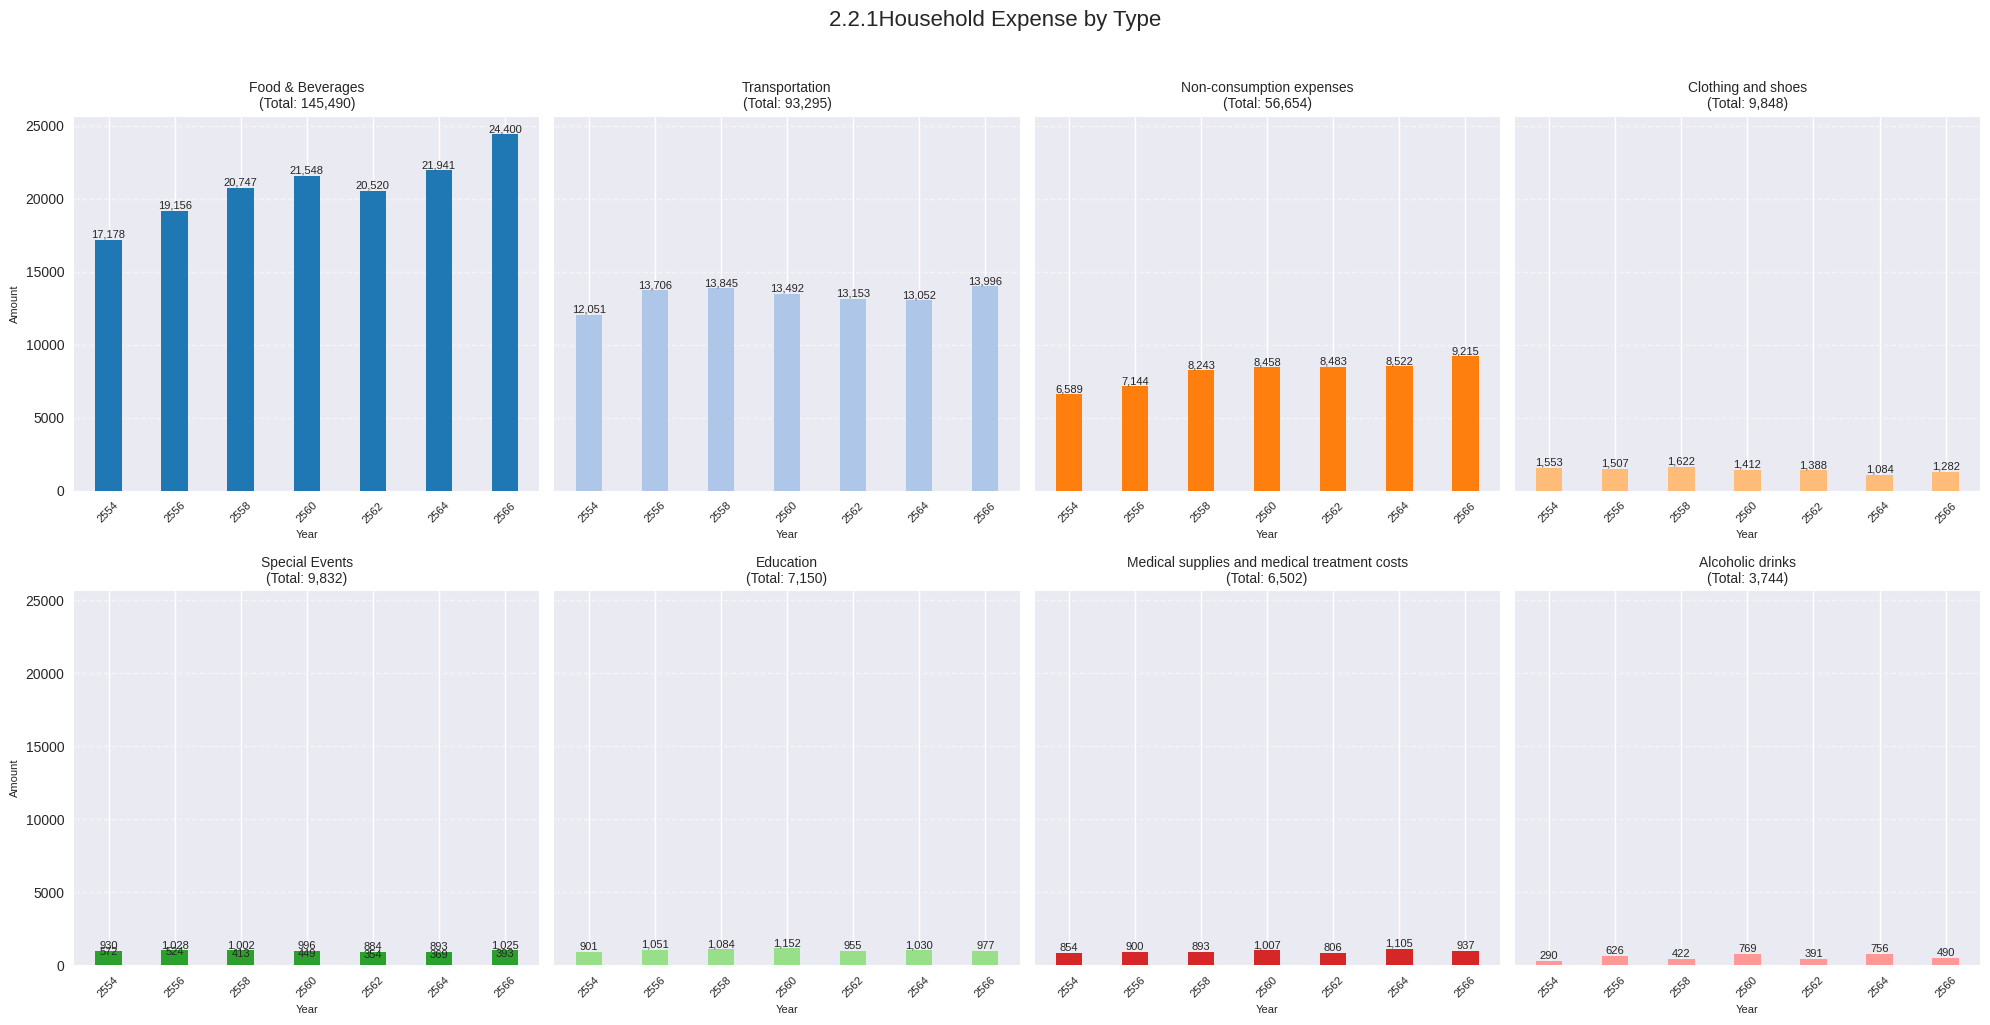

In [41]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. กรอง NaN และลบปี 2565 ออก
df_filtered = df_Type.dropna(subset=['TYPE_EXPENSE_EN'])
df_filtered = df_filtered[df_filtered['YEAR'] != 2565]  # ตัดปี 2565 ออก

# 2. เรียงลำดับประเภทตามผลรวม VALUE (มากไปน้อย)
expense_order = df_filtered.groupby('TYPE_EXPENSE_EN')['VALUE'].sum() \
                          .sort_values(ascending=False) \
                          .index.tolist()

# 3. กำหนดขนาดกราฟ (2 แถว 4 คอลัมน์)
n_rows, n_cols = 2, 4
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 10), sharey=True)
fig.suptitle('2.2.1Household Expense by Type',
             fontsize=16, y=1.02)

# 4. วาดกราฟตามลำดับที่เรียงไว้
for i, expense_type in enumerate(expense_order[:n_rows*n_cols]):  # แสดงไม่เกิน 8 ประเภท
    row, col = i // n_cols, i % n_cols
    ax = axes[row, col]

    df_type = df_filtered[df_filtered['TYPE_EXPENSE_EN'] == expense_type]

    bars = ax.bar(df_type['YEAR'], df_type['VALUE'], color=plt.cm.tab20(i))

    # แสดงค่าบนแท่ง (ปรับรูปแบบตามต้องการ)
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, height,
                f'{height:,.0f}',
                ha='center', va='bottom', fontsize=8)

    # ปรับแต่งกราฟย่อย
    ax.set_title(f"{expense_type}\n(Total: {df_type['VALUE'].sum():,.0f})", fontsize=10)
    ax.set_xlabel('Year', fontsize=8)
    if col == 0:  # แสดงแกน Y เฉพาะกราฟทางซ้ายสุด
        ax.set_ylabel('Amount', fontsize=8)
    ax.tick_params(axis='x', rotation=45, labelsize=8)
    ax.grid(axis='y', linestyle='--', alpha=0.5)

# 5. ซ่อนกราฟที่ไม่ได้ใช้
for j in range(len(expense_order[:n_rows*n_cols]), n_rows * n_cols):
    row, col = j // n_cols, j % n_cols
    fig.delaxes(axes[row, col])

plt.tight_layout()
plt.show()

### 2.3 The Gap between Income and Expenses


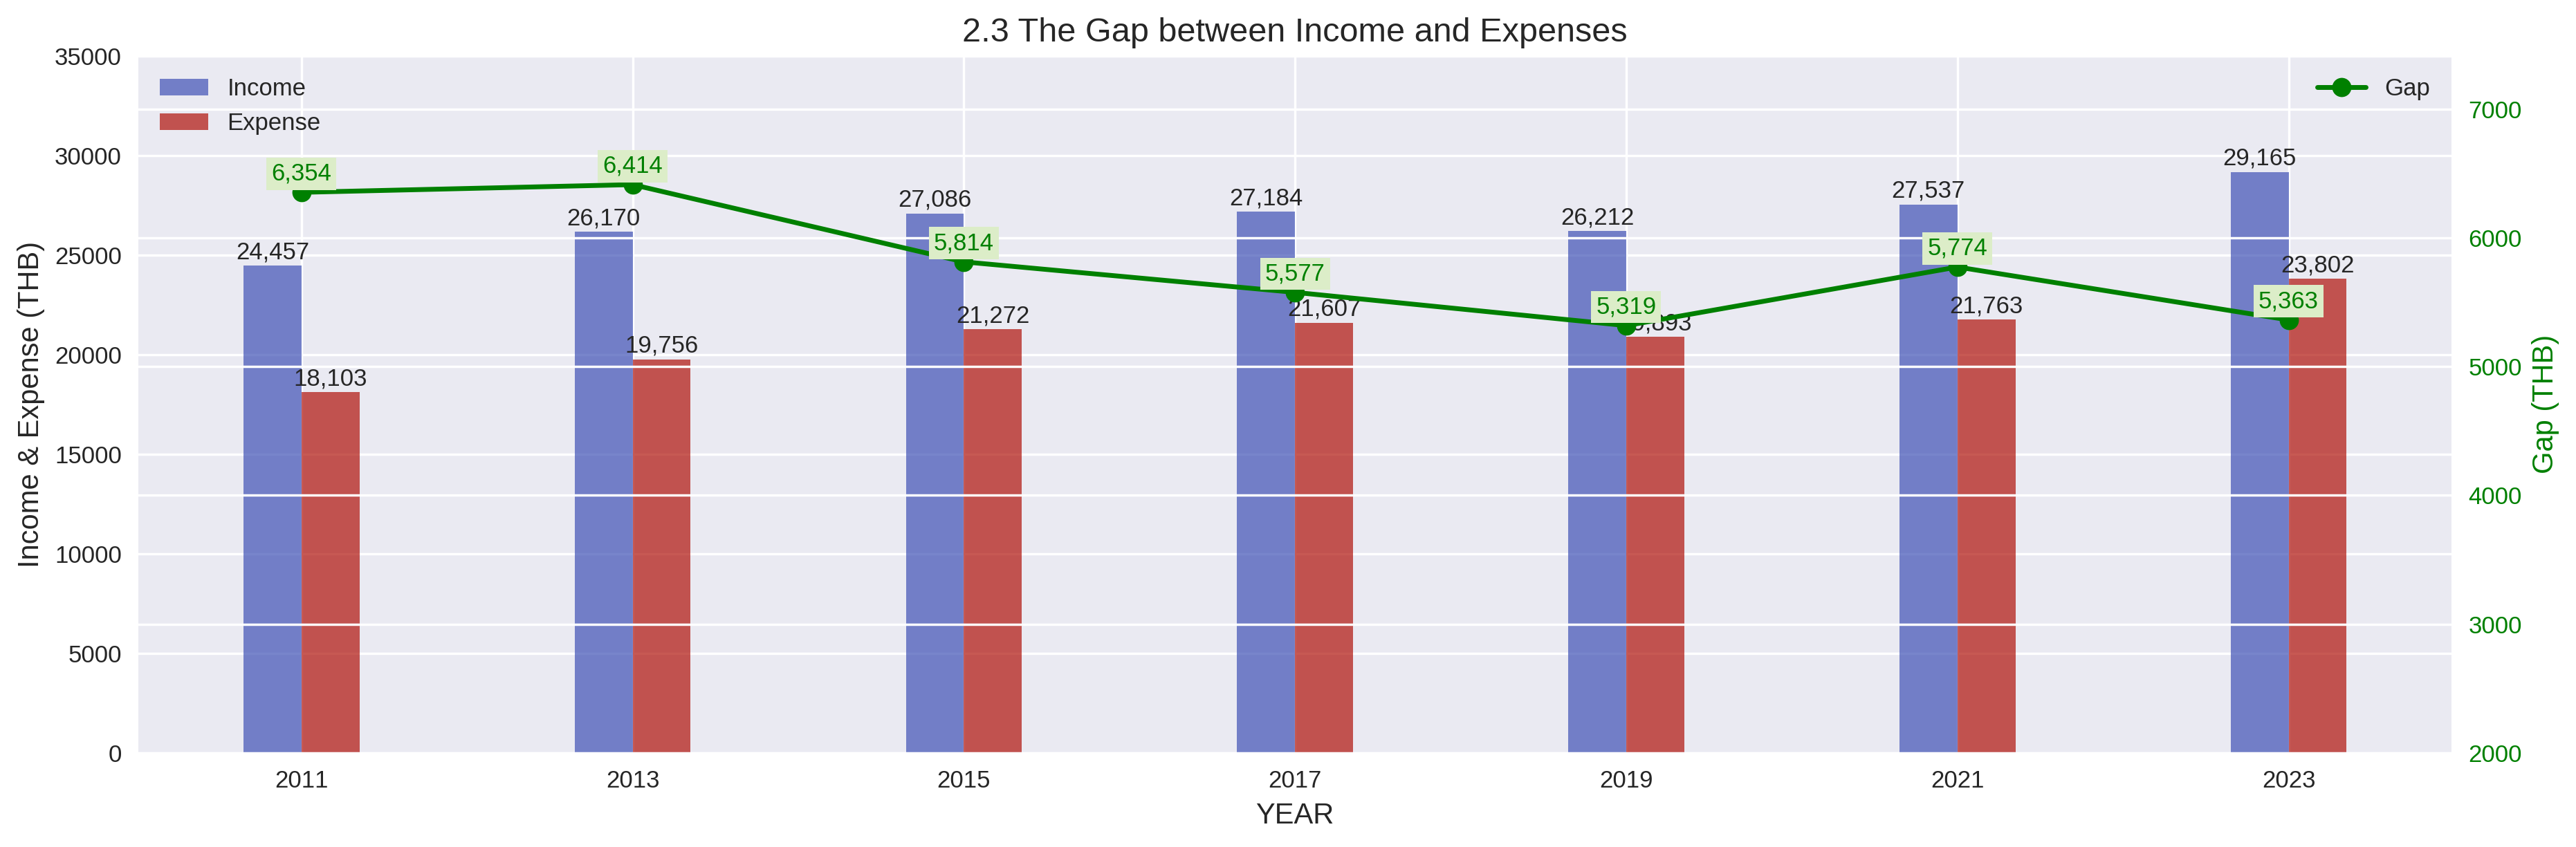

In [42]:
# Figure setting
fig, ax1 = plt.subplots(figsize=(15, 5), dpi=250)

bar_width = 0.35  # custom width bar

# plot Income
ax1.bar(tb['YEAR'] - bar_width/2, tb['INCOME_Month'], width=bar_width, color='#3f51b5', alpha=0.7, label='Income')

# plot Expense
ax1.bar(tb['YEAR'] + bar_width/2, tb['EXPENSE_Month'], width=bar_width, color='#b0120a', alpha=0.7, label='Expense')

ax1.set_ylabel("Income & Expense (THB)", fontsize=12)
ax1.set_xlabel("YEAR", fontsize=12)

# Show values: Income
for i, val in enumerate(tb['INCOME_Month']):
    ax1.text(tb['YEAR'][i] - bar_width/2, val + 100, f'{val:,.0f}', ha='center', va='bottom', fontsize=10)

# Show values: Expense
for i, val in enumerate(tb['EXPENSE_Month']):
    ax1.text(tb['YEAR'][i] + bar_width/2, val + 100, f'{val:,.0f}', ha='center', va='bottom', fontsize=10)

ax1.set_ylim(0 ,35000) #custom y1 limit

# create y2: Gap
ax2 = ax1.twinx()

# Plot Gap
ax2.plot(tb['YEAR'], tb['Gap'], marker='o', color='green', linewidth=2, linestyle='-', label='Gap', markersize=8, zorder=3)

# Custom Scale y2
ax2.set_ylim(2000, max(tb['Gap']) + 1000)
ax2.set_ylabel("Gap (THB)", fontsize=12, color='green')
ax2.tick_params(axis='y', labelcolor='green')

# Show values: Gap
for i, txt in enumerate(tb['Gap']):
    ax2.annotate(f'{txt:,.0f}', (tb['YEAR'][i], tb['Gap'][i]), textcoords="offset points", xytext=(0,5), ha='center', fontsize=10, color='green',bbox=dict(facecolor='#dcedc8', edgecolor='none', pad=2))

# Show Legend
ax1.legend(loc="upper left")
ax2.legend(loc="upper right")

plt.title("2.3 The Gap between Income and Expenses", fontsize=14)
plt.xticks(tb['YEAR'])  # custom x-axis
plt.setp(ax1.get_xticklabels(), rotation=0, horizontalalignment='center')
plt.tight_layout()  # custom layout
plt.show()

## 3.Calculate the Ratio of Income-Expense to GDP

Calculate the Ratio of Income-Expenses to GDP

   - Formula

           Average Income Ratio to GDP = (Average Monthly Income x 12) / GDP per Household

           Average Expense Ratio to GDP = (Average Monthly Expenses x 12) / GDP per Household

   - If the expense ratio is higher than the income ratio, it may reflect an increase in household debt.

### Table of the Ratio of Income-Expenses to GDP


In [43]:
# Calculate (Year)
tb['INCOME_Year'] = tb['INCOME_Month'] * 12
tb['EXPENSE_Year'] = tb['EXPENSE_Month'] * 12
tb['GDP_Year'] = tb['GDP_Month'] * 12

# Calculate (GDP_Ratio)
tb['INCOME_GDP_Ratio'] = tb['INCOME_Year'] / tb['GDP_Year']
tb['EXPENSE_GDP_Ratio'] = tb['EXPENSE_Year'] / tb['GDP_Year']

# Calculate (DIFF_INCOME_EXPENSE)
tb['DIFF_INCOME_EXPENSE'] = tb['INCOME_Month'] - tb['EXPENSE_Month']

# Calculate (DEBT_RISK)
tb['HOUSEHOLD_DEBT_RISK'] = tb.apply(
    lambda row: "May reflect" if row['EXPENSE_GDP_Ratio'] > row['INCOME_GDP_Ratio'] else "Not reflect",
    axis=1
)

tb['DEBT_RISK_LEVEL'] = tb.apply(
    lambda row: "High" if (row['EXPENSE_GDP_Ratio'] > row['INCOME_GDP_Ratio'] * 1.05 and row['DIFF_INCOME_EXPENSE'] < 5000) else ("Medium" if row['EXPENSE_GDP_Ratio'] > row['INCOME_GDP_Ratio'] else "Low"),
    axis=1
)

display(tb.head(10))

,YEAR,INCOME_Month,EXPENSE_Month,GDP_Month,Gap,Date,Inflation-rate,% Change,Real_Income,Real_Expense,...,Wage_Growth_%,EXPENSE_Ratio_Percent,INCOME_Year,EXPENSE_Year,GDP_Year,INCOME_GDP_Ratio,EXPENSE_GDP_Ratio,DIFF_INCOME_EXPENSE,HOUSEHOLD_DEBT_RISK,DEBT_RISK_LEVEL
0,2011,24457.0,18103.0,35691.0,6354.0,31/12/2011,7.0564,2.4336,22844.967699,16909.778397,...,NaN,0.740197,293484.0,217236.0,428292.0,0.685243,0.507215,6354.0,Not reflect,Low
1,2013,26170.0,19756.0,40768.0,6414.0,31/12/2013,5.1998,-1.8566,24876.473149,18779.503383,...,35.746606,0.754910,314040.0,237072.0,489216.0,0.641925,0.484596,6414.0,Not reflect,Low
2,2015,27086.0,21272.0,43382.0,5814.0,31/12/2015,0.9947,-4.2051,26819.229128,21062.491398,...,0.000000,0.785350,325032.0,255264.0,520584.0,0.624360,0.490342,5814.0,Not reflect,Low
3,2017,27184.0,21607.0,48891.0,5577.0,31/12/2017,0.8537,-0.1410,26953.894602,21424.102437,...,3.333333,0.794843,326208.0,259284.0,586692.0,0.556012,0.441942,5577.0,Not reflect,Low
4,2019,26212.0,20893.0,53312.0,5319.0,31/12/2019,1.7706,0.9169,25755.964886,20529.504592,...,6.451613,0.797078,314544.0,250716.0,639744.0,0.491672,0.391901,5319.0,Not reflect,Low
5,2021,27537.0,21763.0,51100.0,5774.0,31/12/2021,0.3845,-1.3861,27431.525783,21679.641777,...,1.818182,0.790318,330444.0,261156.0,613200.0,0.538885,0.425890,5774.0,Not reflect,Low
6,2023,29165.0,23802.0,56572.0,5363.0,31/12/2023,7.3054,6.9209,27179.433654,22181.549111,...,5.357143,0.816115,349980.0,285624.0,678864.0,0.515538,0.420738,5363.0,Not reflect,Low


### 3. The Ratio of Income-Expense to GDP

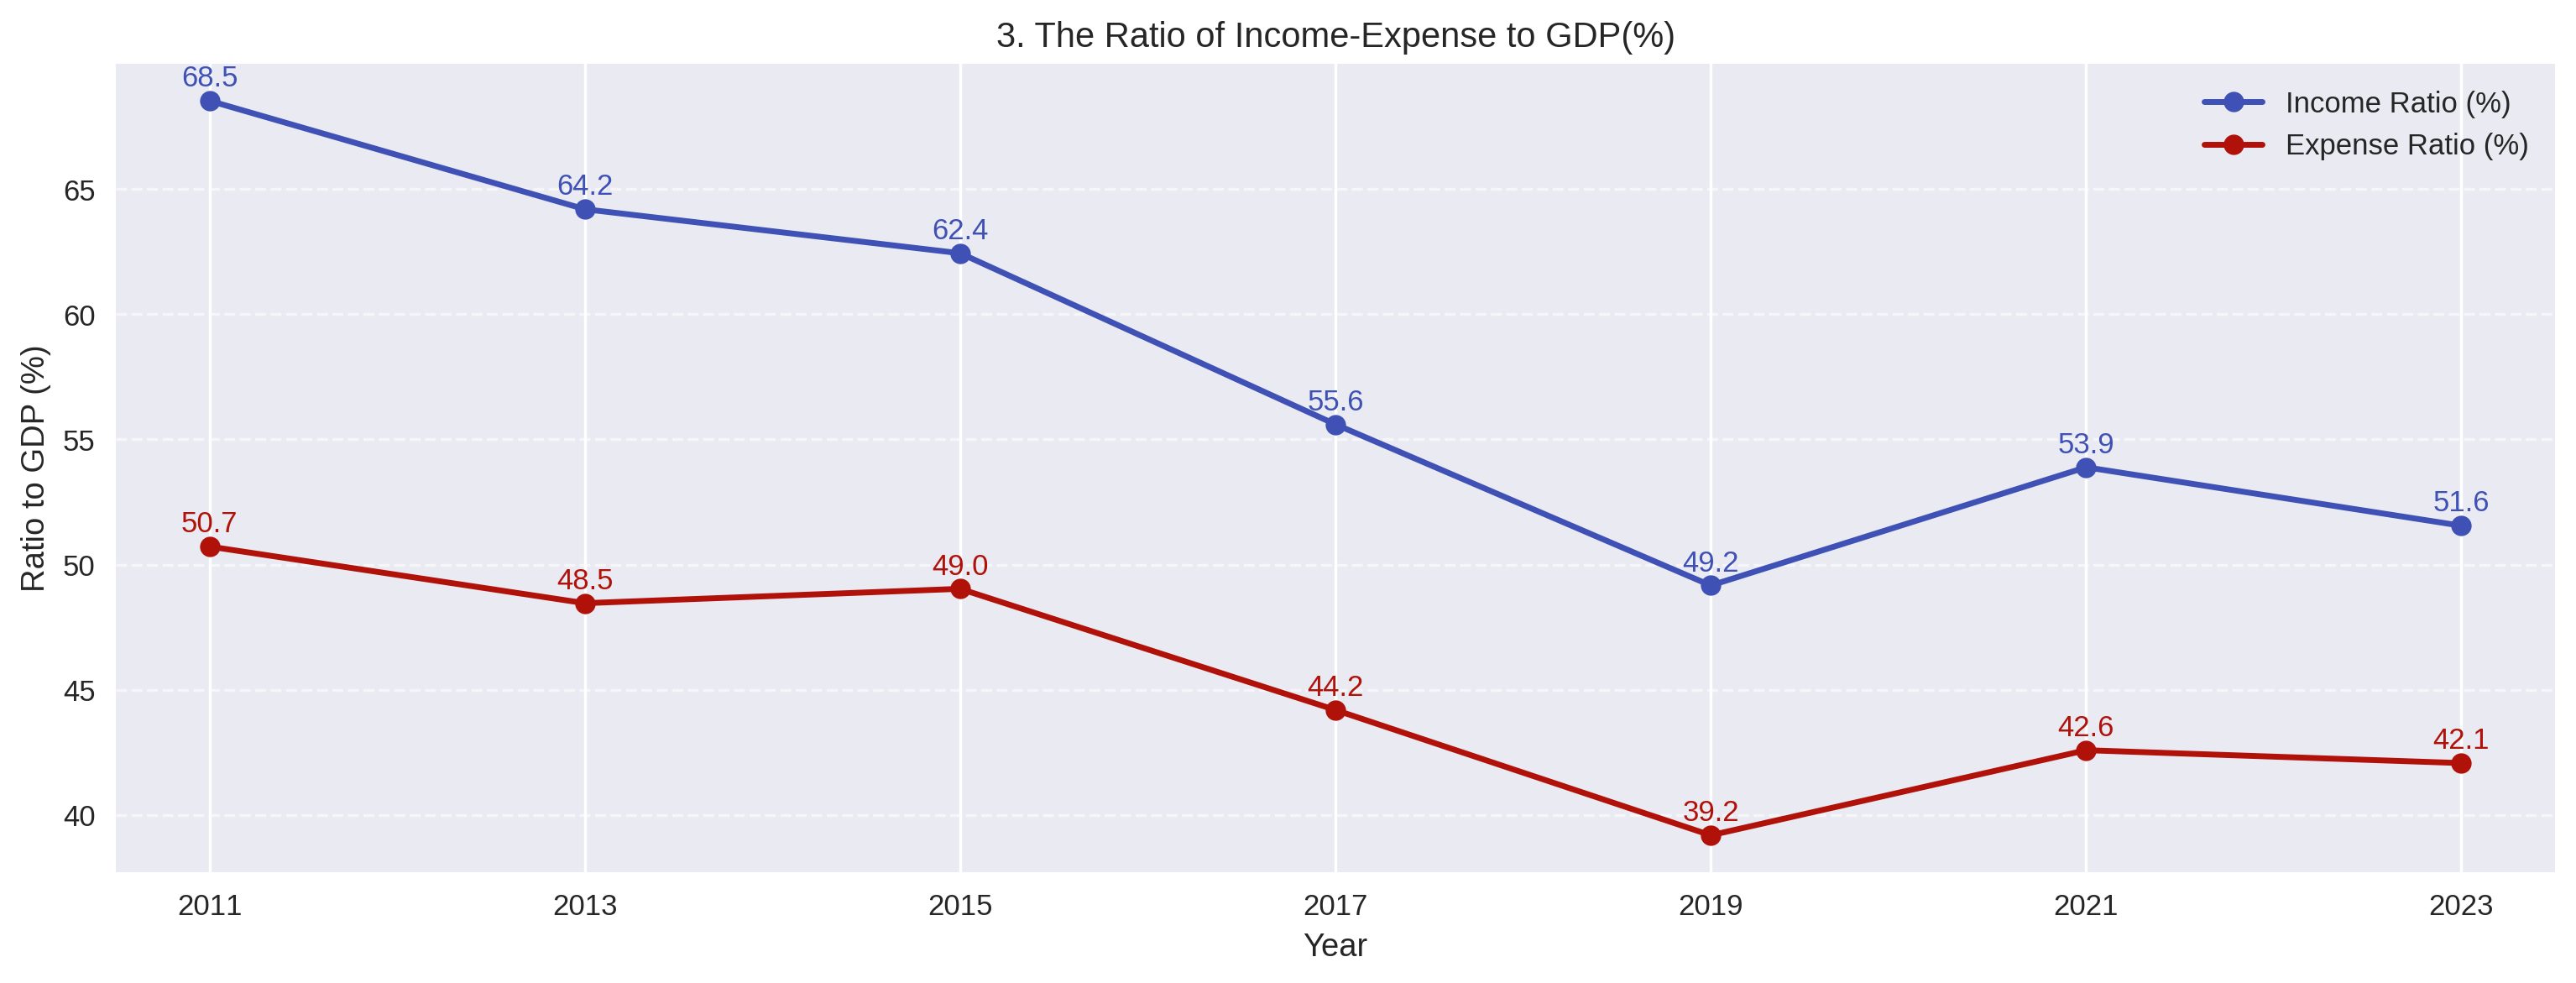

In [44]:
# Calculate Formula
tb['INCOME_GDP_Ratio_Percent'] = (tb['INCOME_Month'] * 12) / tb['GDP_Year'] * 100
tb['EXPENSE_GDP_Ratio_Percent'] = (tb['EXPENSE_Month'] * 12) / tb['GDP_Year'] * 100

# Figure setting
plt.figure(figsize=(15, 5), dpi=250)
ax = plt.gca()

# Plot
plt.plot(tb['YEAR'], tb['INCOME_GDP_Ratio_Percent'], label='Income Ratio (%)', color='#3f51b5', marker='o', linestyle='-', linewidth=2)
plt.plot(tb['YEAR'], tb['EXPENSE_GDP_Ratio_Percent'], label='Expense Ratio (%)', color='#b0120a', marker='o', linestyle='-', linewidth=2)

# Annotate
for i, txt in enumerate(tb['INCOME_GDP_Ratio_Percent']):
    ax.annotate(f'{txt:,.1f}', (tb['YEAR'][i], tb['INCOME_GDP_Ratio_Percent'][i]), textcoords="offset points", xytext=(0,5), ha='center', fontsize=10, color='#3f51b5')

for i, txt in enumerate(tb['EXPENSE_GDP_Ratio_Percent']):
    ax.annotate(f'{txt:,.1f}', (tb['YEAR'][i], tb['EXPENSE_GDP_Ratio_Percent'][i]), textcoords="offset points", xytext=(0,5), ha='center', fontsize=10, color='#b0120a')

# Custom label
plt.xlabel('Year')
plt.ylabel('Ratio to GDP (%)')
plt.title('3. The Ratio of Income-Expense to GDP(%)')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.xlim(min(tb['YEAR'])-0.5, max(tb['YEAR'])+0.5)
plt.xticks(tb['YEAR'].unique())

plt.show()



## 4.Correlation Analysis

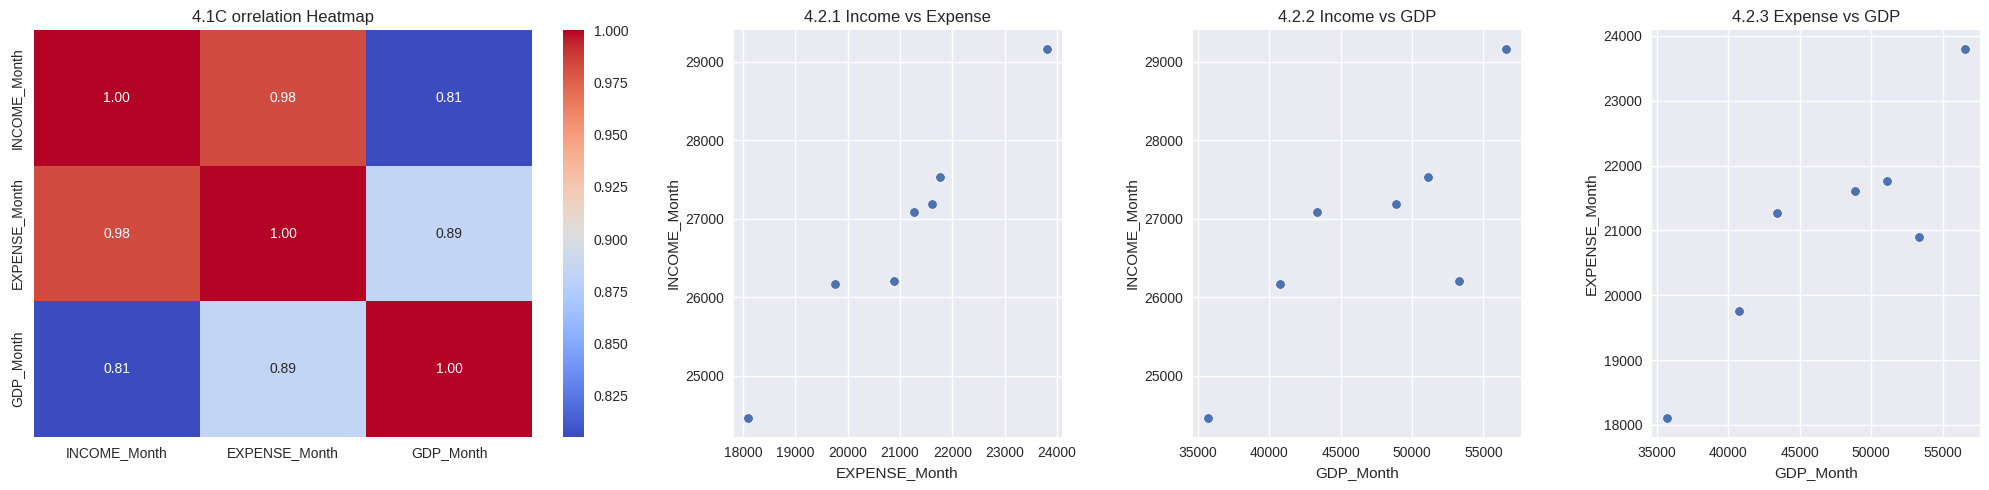

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

df_corr = tb[['INCOME_Month', 'EXPENSE_Month', 'GDP_Month']]
corr_matrix = df_corr.corr()

# --- สร้าง layout หลัก 1 แถว 2 คอลัมน์ ---
fig = plt.figure(figsize=(20, 5))
grid = fig.add_gridspec(1, 2, width_ratios=[1, 2])

# --- ซ้าย: Heatmap ---
ax_heatmap = fig.add_subplot(grid[0])
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', ax=ax_heatmap)
ax_heatmap.set_title("4.1C orrelation Heatmap")

# --- ขวา: 3 scatter plots เรียงแนวนอน ---
grid_right = grid[1].subgridspec(1, 3, wspace=0.4)

# 1. Income vs Expense
ax1 = fig.add_subplot(grid_right[0])
sns.scatterplot(data=df_corr, y='INCOME_Month', x='EXPENSE_Month', ax=ax1)
ax1.set_title("4.2.1 Income vs Expense")

# 2. Income vs GDP
ax2 = fig.add_subplot(grid_right[1])
sns.scatterplot(data=df_corr, y='INCOME_Month', x='GDP_Month', ax=ax2)
ax2.set_title("4.2.2 Income vs GDP")

# 3. Expense vs GDP
ax3 = fig.add_subplot(grid_right[2])
sns.scatterplot(data=df_corr, y='EXPENSE_Month', x='GDP_Month', ax=ax3)
ax3.set_title("4.2.3 Expense vs GDP")

plt.tight_layout()
plt.show()

Relationship	Correlation Coefficient	Interpretation

*   Income ↔ Expenses	0.99	✅ Very strong positive correlation

*   Income ↔ GDP	0.85	    ✅ Strong positive correlation

*   Expenses ↔ GDP	0.89	  ✅ Strong positive correlation

Income and expenses tend to move together almost all the time.
Both income and expenses show a positive correlation with the country's GDP.

## 5.Purchasing Power

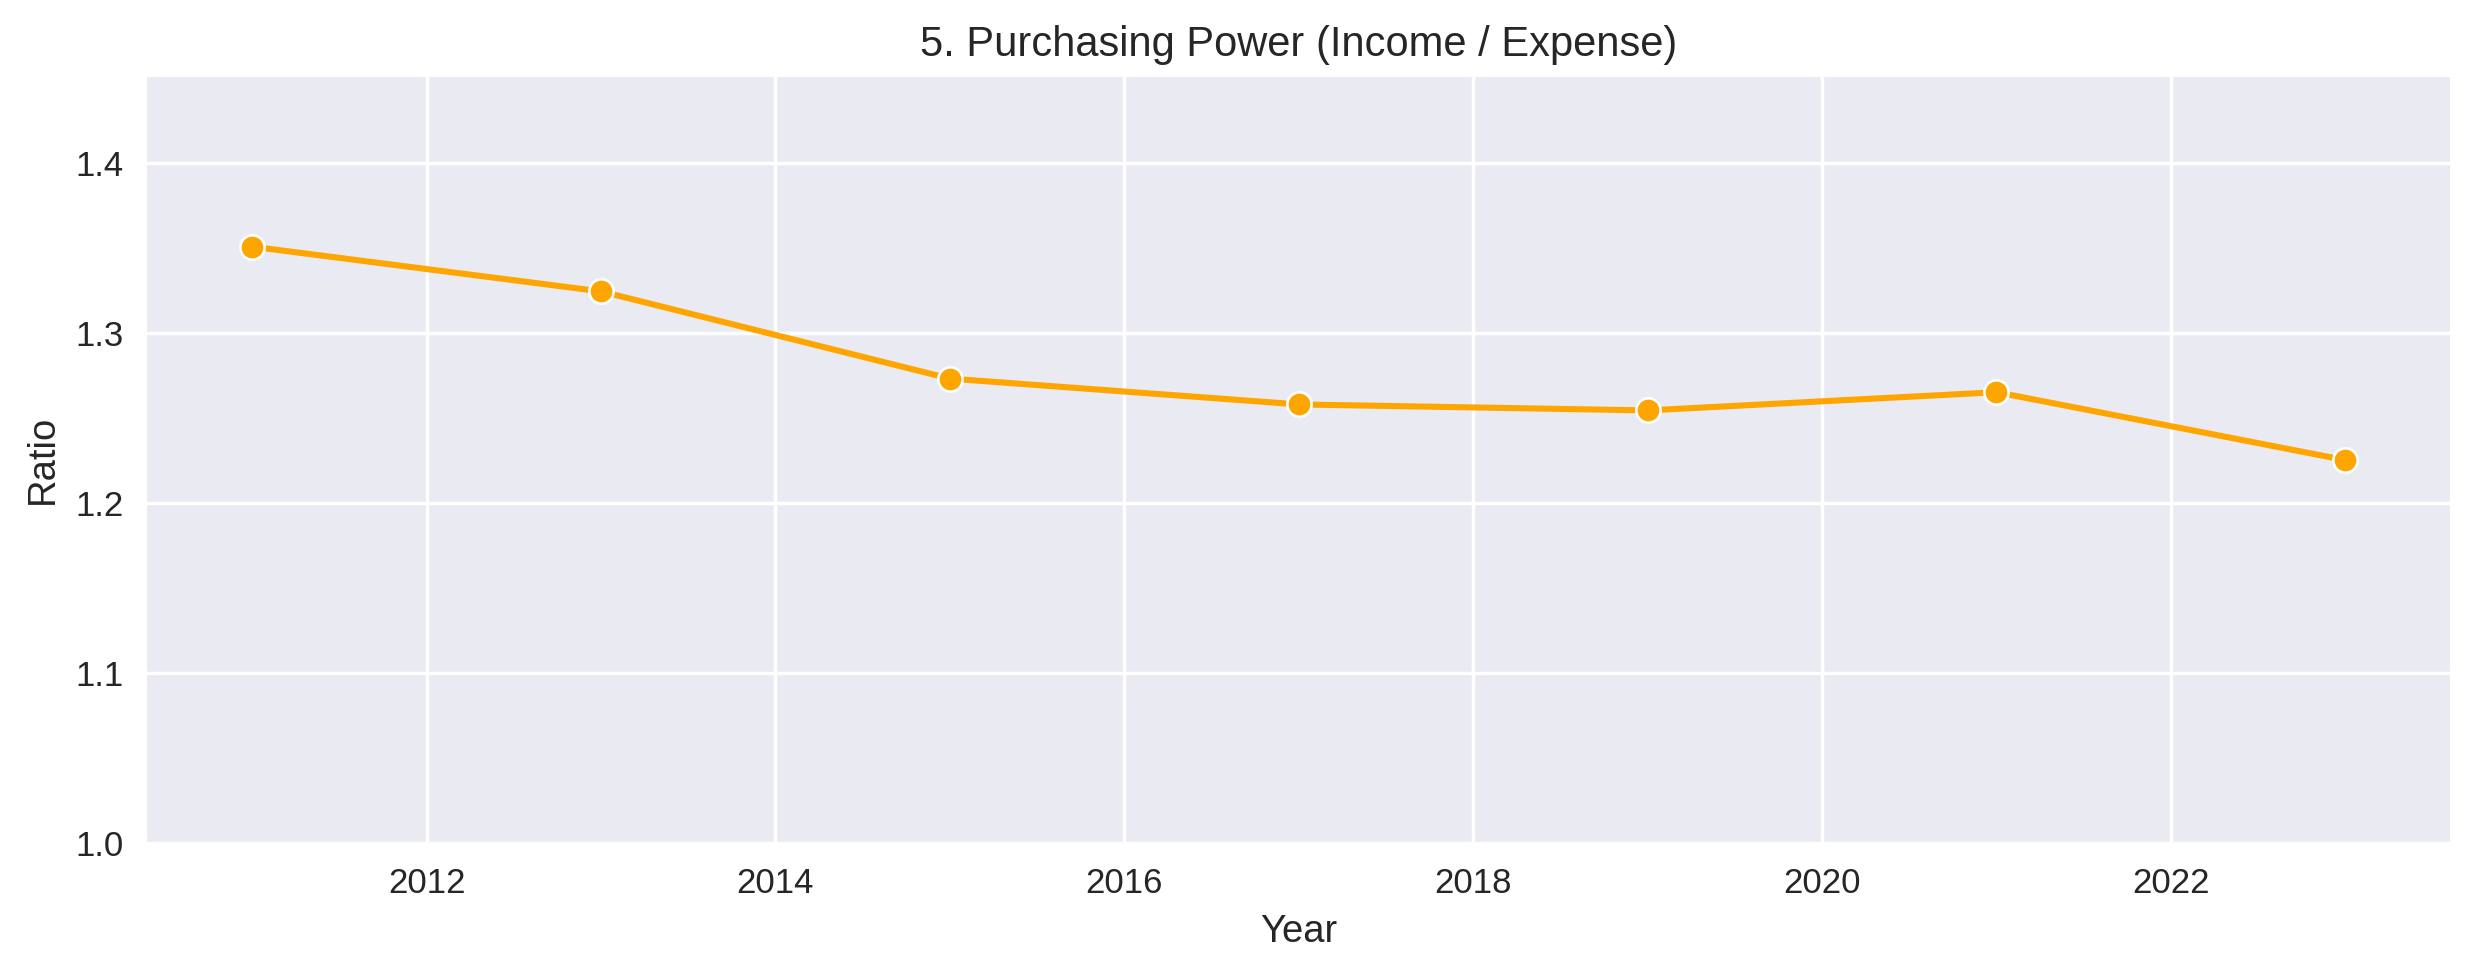

In [46]:
# คำนวณกำลังซื้อ
tb['PurchasingPower'] = tb['INCOME_Month'] / tb['EXPENSE_Month']

# แสดงแนวโน้มกำลังซื้อ
plt.figure(figsize=(10, 4), dpi=250)
sns.lineplot(data=tb, x='YEAR', y='PurchasingPower', marker='o', color='orange')
plt.title('5. Purchasing Power (Income / Expense)')
plt.ylabel('Ratio')
plt.xlabel('Year')
plt.ylim(1.0, tb['PurchasingPower'].max() + 0.1)
plt.grid(True)
plt.tight_layout()
plt.show()

Purchasing Power = Income / Expenses

A higher value indicates more money remaining after expenses, reflecting greater purchasing power.

📉 Observed Trends:

*   2011–2013: Purchasing power remained above 1.3, indicating relatively strong consumer capacity.

*   2015–2023: A steady decline in purchasing power was observed.

Most recent year (2023): Purchasing power dropped to approximately 1.23, suggesting that expenses are now closer to income levels.

📝 Policy Implications:

The rising cost of living may be eroding the purchasing power of Thai households.

Income growth is not keeping pace with the increase in expenses, posing challenges to household financial stability.

## 6.Inflation Analysis

###6.1 Income vs Rate

*   6.1.1 Income Growth vs Inflation Rate
*   6.1.2 Accumulated Income vs Inflation



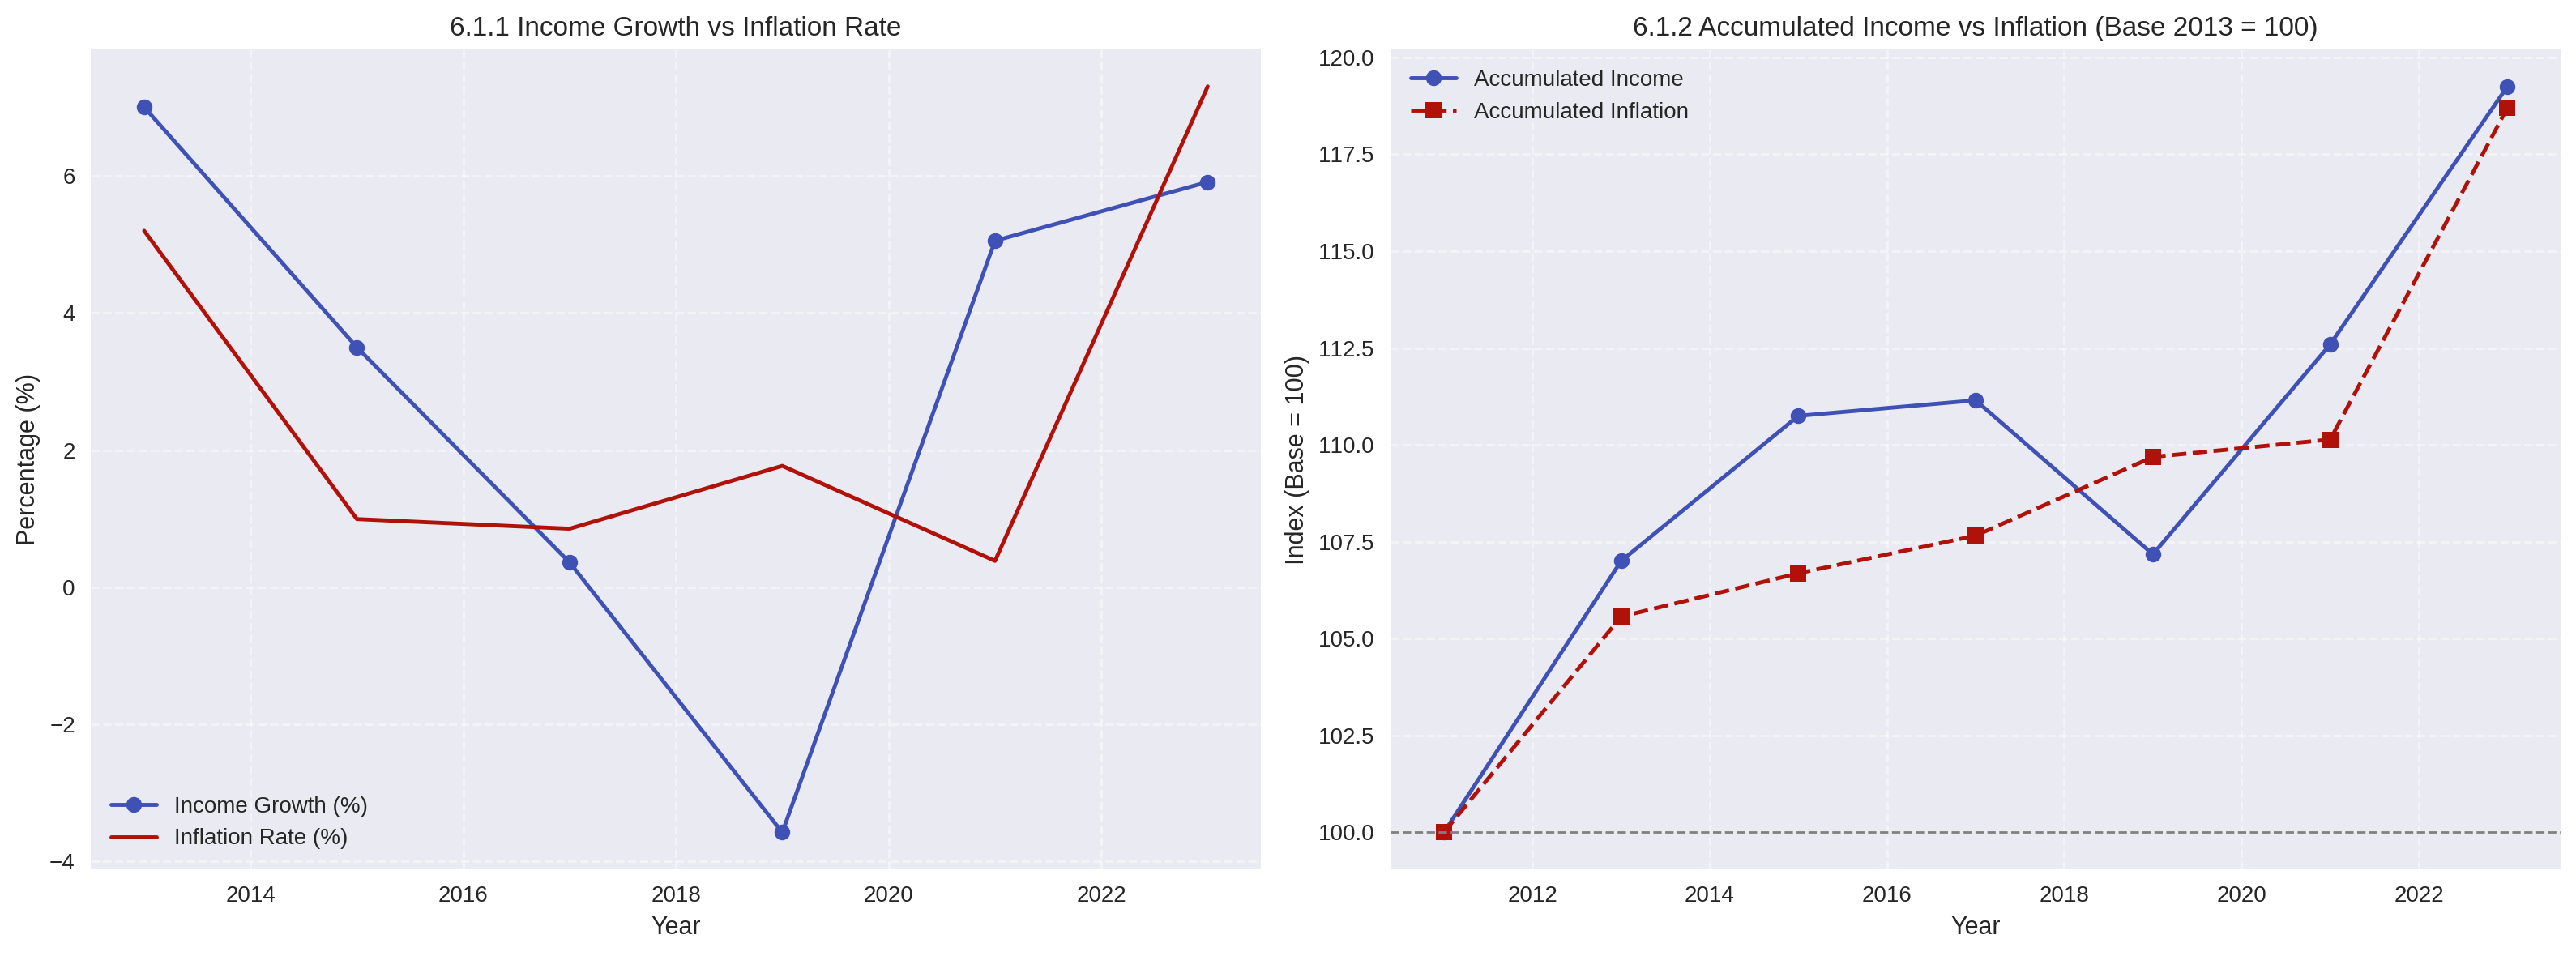

In [47]:
# --- เตรียมข้อมูล 1: Income Growth vs Inflation Rate ---
tb['INCOME_Growth'] = tb['INCOME_Month'].pct_change() * 100
tb_2013 = tb[tb['YEAR'] >= 2013]

# --- เตรียมข้อมูล 2: Accumulated Income vs Inflation ---
tb_2011 = tb[tb['YEAR'] >= 2011].copy()
tb_2011 = tb_2011.sort_values('YEAR').reset_index(drop=True)
tb_2011["Accum_Income_Index"] = (tb_2011["INCOME_Month"] / tb_2011["INCOME_Month"].iloc[0]) * 100
tb_2011["Accum_Inflation_Index"] = ((1 + tb_2011["Inflation-rate"] / 100).cumprod() * 100) - 7.0564  # คุณใช้ค่าปรับนี้อยู่แล้ว

# --- สร้าง subplot 1 แถว 2 คอลัมน์ ---
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6), dpi=200)

# ✅ ซ้าย: Income Growth vs Inflation Rate
ax1.plot(tb_2013['YEAR'], tb_2013['INCOME_Growth'], label='Income Growth (%)', marker='o', color='#3f51b5')
ax1.plot(tb_2013['YEAR'], tb_2013['Inflation-rate'], label='Inflation Rate (%)', marker='x', color='#b0120a')
ax1.set_title("6.1.1 Income Growth vs Inflation Rate")
ax1.set_xlabel("Year")
ax1.set_ylabel("Percentage (%)")
ax1.legend()
ax1.grid(True, linestyle='--', alpha=0.5)

# ✅ ขวา: Accumulated Index
ax2.plot(tb_2011["YEAR"], tb_2011["Accum_Income_Index"], label="Accumulated Income", marker='o', color="#3f51b5")
ax2.plot(tb_2011["YEAR"], tb_2011["Accum_Inflation_Index"], label="Accumulated Inflation", linestyle='--', marker='s', color="#b0120a")
ax2.axhline(100, color='gray', linestyle='--', linewidth=1)
ax2.set_title("6.1.2 Accumulated Income vs Inflation (Base 2013 = 100)")
ax2.set_xlabel("Year")
ax2.set_ylabel("Index (Base = 100)")
ax2.legend()
ax2.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

###6.2 Wage vs Inflation


*   6.2.1 Wage Growth vs Inflation Rate
*   6.2.2 Accumulated Minimum Wage vs Inflation





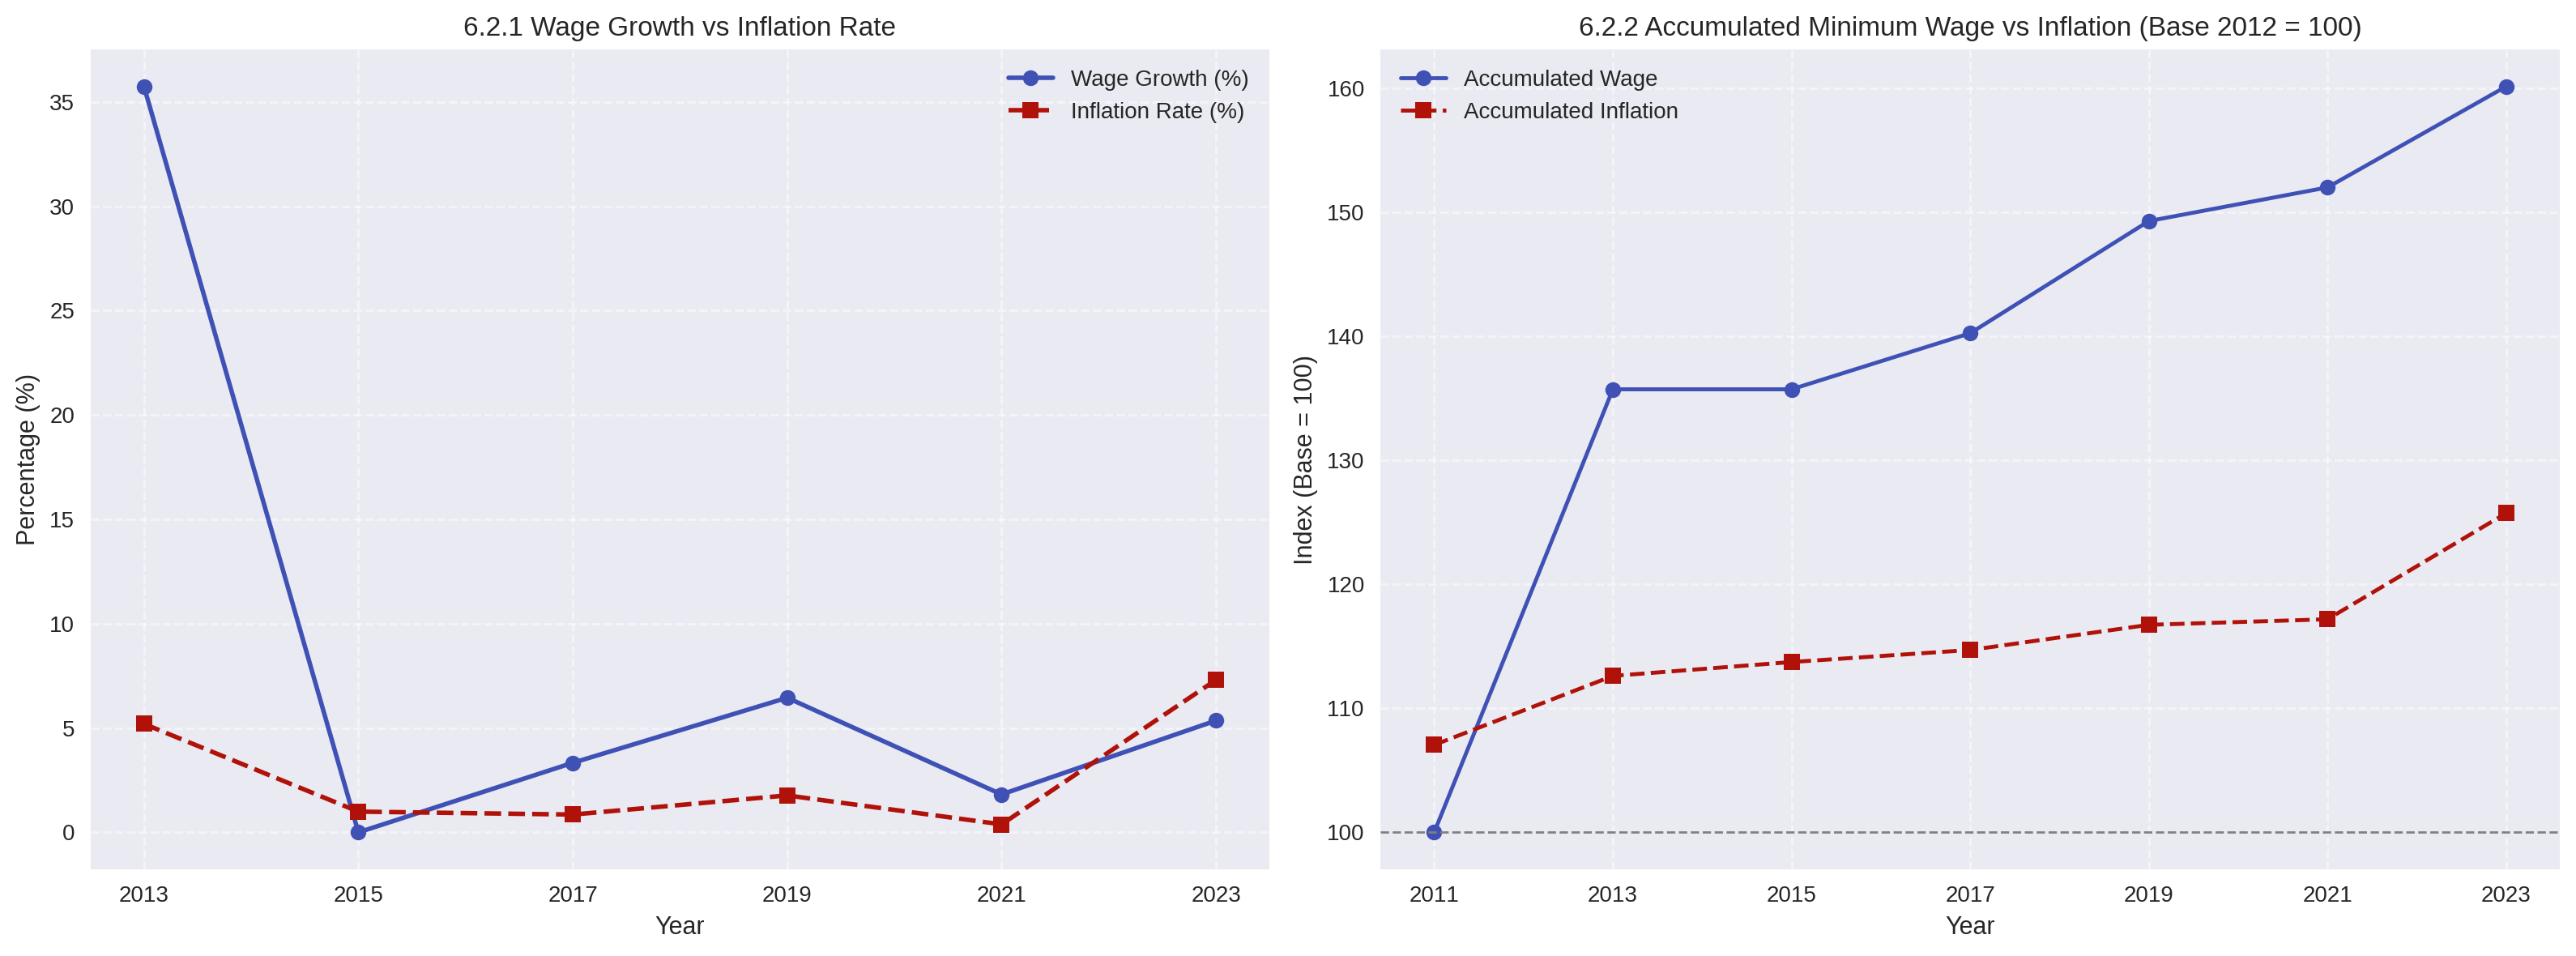

In [51]:
# --- เตรียมข้อมูล (ถ้ายังไม่มีใน tb) ---
tb['Wage_Growth_%'] = tb['Max of Minimum Labor'].pct_change() * 100
tb_2013 = tb[tb['YEAR'] >= 2013].copy()

tb = tb.sort_values('YEAR').reset_index(drop=True)
tb["Accum_Wage_Index"] = (tb["Max of Minimum Labor"] / tb["Max of Minimum Labor"].iloc[0]) * 100
tb["Accum_Inflation_Index"] = ((1 + tb["Inflation-rate"] / 100).cumprod()) * 100

# --- สร้าง subplot 1 แถว 2 คอลัมน์ ---
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6), dpi=200)

# ✅ ซ้าย: Wage Growth vs Inflation Rate
ax1.plot(tb_2013['YEAR'], tb_2013['Wage_Growth_%'], label='Wage Growth (%)', marker='o', linewidth=2, color='#3f51b5')
ax1.plot(tb_2013['YEAR'], tb_2013['Inflation-rate'], label='Inflation Rate (%)', marker='s', linestyle='--', linewidth=2, color='#b0120a')
ax1.set_title('6.2.1 Wage Growth vs Inflation Rate')
ax1.set_xlabel('Year')
ax1.set_ylabel('Percentage (%)')
ax1.legend()
ax1.grid(True, linestyle='--', alpha=0.5)
ax1.set_xticks(tb_2013['YEAR'])

# ✅ ขวา: Accumulated Index
ax2.plot(tb['YEAR'], tb["Accum_Wage_Index"], label="Accumulated Wage", marker='o', color="#3f51b5")
ax2.plot(tb['YEAR'], tb["Accum_Inflation_Index"], label="Accumulated Inflation", linestyle='--', marker='s', color="#b0120a")
ax2.axhline(100, color='gray', linestyle='--', linewidth=1)
ax2.set_title("6.2.2 Accumulated Minimum Wage vs Inflation (Base 2012 = 100)")
ax2.set_xlabel("Year")
ax2.set_ylabel("Index (Base = 100)")
ax2.legend()
ax2.grid(True, linestyle='--', alpha=0.5)
ax2.set_xticks(tb['YEAR'])
1
plt.tight_layout()
plt.show()


## 7.Conclusion

An analysis of historical income and expenditure data reveals a consistent year-on-year increase in both income and expenses among the Thai population. However, the rate of expenditure growth has outpaced that of income, resulting in reduced savings and an increased likelihood of household debt. This trend suggests that many individuals are compelled to borrow due to financial necessities exceeding their income.

Further analysis across multiple economic dimensions—such as Gross Domestic Product (GDP), inflation rate, and minimum wage—indicates that all these factors contribute to the rising cost of living. Among them, the most significant impact stems from the rising cost of living, which has increased at a rate higher than inflation.

This surge in the cost of living is largely attributed to rising production and service costs, especially in essential utilities such as fuel and electricity. These energy costs are noticeably higher in Thailand compared to neighboring countries in the same region

## 8.References

Average Income #ระดับภูมิภาค
* website: https://data.go.th/dataset/ns_08_20241

Average Outcome #ระดับภูมิภาค
* website: https://data.go.th/dataset/os_08_00009

GDP
* website: https://www.nesdc.go.th/main.php?filename=qgdp_page
* Table Reference: Table 3_Gross Domestic Product at Current Market Prices (Original)